<a href="https://colab.research.google.com/github/kthhtk/AIFFEL_Quest_cr/blob/master/MainQuest/MainQuest02/MainQuest02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MainQuest02

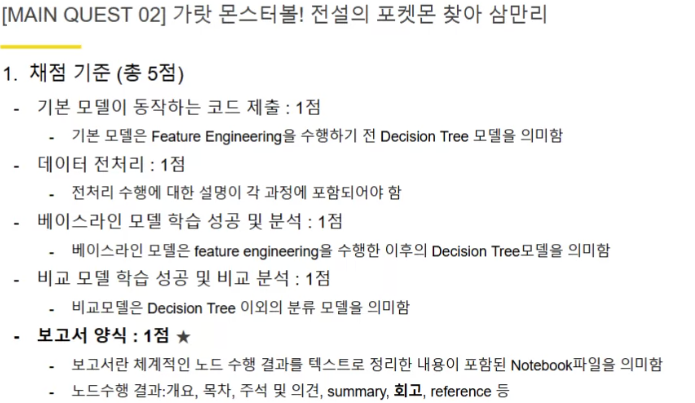

##포켓몬 데이터 불러오기

### 라이브러리 가져오기

In [2]:
import numpy as np                                 # 수치 연산을 위한 NumPy 라이브러리 임포트
import pandas as pd                                # 데이터 분석을 위한 Pandas 라이브러리 임포트
import seaborn as sns                              # 데이터 시각화를 위한 Seaborn 라이브러리 임포트
import matplotlib.pyplot as plt                    # 그래프 생성을 위한 Matplotlib 라이브러리 임포트
# %matplotlib inline                                 # Jupyter 노트북에서 그래프를 직접 출력하도록 설정
# %config InlineBackend.figure_format = 'retina'     # 그래프의 해상도를 Retina 디스플레이에 맞게 설정

### 데이터셋을 pandas 로 불러오기

In [12]:
# import os                                                               # 운영체제 관련 기능을 제공하는 모듈 임포트
# csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"    # HOME 환경변수를 가져와 Pokemon.csv 파일의 전체 경로 생성
# original_data = pd.read_csv(csv_path)                                   # pandas를 사용하여 CSV 파일을 데이터프레임으로 읽어들임

# 위의 코드는 쥬피터 노트북 파일을 불러오는 코드라 코랩과 연동이 안됨


from google.colab import files                # 구글 코랩에서 파일을 업로드하기 위한 모듈을 임포트
uploaded = files.upload()                     # 파일 선택창이 뜨면 Pokemon.csv 파일을 선택
original_data = pd.read_csv('Pokemon.csv')    # 업로드된 파일 읽기

Saving Pokemon.csv to Pokemon.csv


#### 복사본 데이터 생성

In [13]:
pokemon = original_data.copy()                    # 원본 데이터를 변경하지 않기 위해 복사본 생성
print(pokemon.shape)                              # 데이터프레임의 행과 열의 개수 출력 (행, 열)
pokemon.head()                                    # 데이터프레임의 처음 5개 행을 출력하여 데이터 확인

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


####전설 포켓몬 데이터셋 생성

In [14]:
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)    # Legendary 컬럼이 True인 전설의 포켓몬만 필터링하고 인덱스 초기화
print(legendary.shape)                                                      # 전설의 포켓몬 데이터의 행과 열의 개수 출력 (행, 열)
legendary.head()                                                            # 전설의 포켓몬 데이터 중 처음 5개 행을 출력하여 확인

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


####일반 포켓몬 데이터셋 생성

In [15]:
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)    # Legendary 컬럼이 False인 일반 포켓몬만 필터링하고 인덱스 초기화
print(ordinary.shape)                                                       # 일반 포켓몬 데이터의 행과 열의 개수 출력 (행, 열)
ordinary.head()                                                             # 일반 포켓몬 데이터 중 처음 5개 행을 출력하여 확인

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 데이터 살펴보기

###(1) 결측치와 전체 칼럼

####결측치

In [16]:
pokemon.isnull().sum()                           # 데이터프레임의 각 컬럼별 결측치(Null값) 개수를 확인하고 합산하여 출력

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


#### 전체 컬럼 이해하기


In [17]:
print(len(pokemon.columns))
pokemon.columns                                    # 데이터프레임의 모든 컬럼명을 출력하여 데이터 구조 확인

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

###(2) ID 와 이름

#### \# : ID number

In [19]:
len(set(pokemon["#"]))                            # 포켓몬 번호(#)의 중복을 제거한 고유한 값의 개수를 계산

721

In [20]:
pokemon[pokemon["#"] == 6]                         # 포켓몬 번호가 6번인 포켓몬의 모든 정보를 출력

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


#### Name : 이름

In [21]:
# Q. 총 몇 종류의 포켓몬 이름이 있는지 확인해봅시다!
len(set(pokemon["Name"]))                         # 포켓몬 이름(Name) 컬럼의 중복을 제거한 고유한 이름의 개수를 계산


800

###(3) 포켓몬의 속성

####Type 1 & Type 2 : 포켓몬의 속성

In [22]:
pokemon.loc[[6, 10]]                              # 인덱스가 6번과 10번인 포켓몬들의 모든 정보를 출력

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


##### 각 Type 의 개수

In [23]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))    # Type 1과 Type 2 컬럼의 중복을 제거한 고유한 타입의 개수를 각각 계산

(18, 19)

#####Type 차집합으로 결측치 파악

In [24]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])    # Type 2에만 있고 Type 1에는 없는 고유한 타입들의 차집합을 계산

{nan}

#####결측치 제외 리스트 생성

In [25]:
types = list(set(pokemon["Type 1"]))                  # Type 1 컬럼의 중복을 제거하여 고유한 타입들의 리스트를 생성
print(len(types))                                     # 고유한 타입의 총 개수를 출력
print(types)                                          # 고유한 타입들의 목록을 출력

18
['Ground', 'Poison', 'Water', 'Fire', 'Electric', 'Fairy', 'Dark', 'Rock', 'Flying', 'Dragon', 'Ice', 'Ghost', 'Fighting', 'Bug', 'Normal', 'Grass', 'Psychic', 'Steel']


##### 1가지 Type 포켓몬 개수

In [26]:
pokemon["Type 2"].isna().sum()                    # Type 2가 결측치(NaN)인 포켓몬의 개수를 계산하여 출력

386

####Type 1 데이터 분포 plot

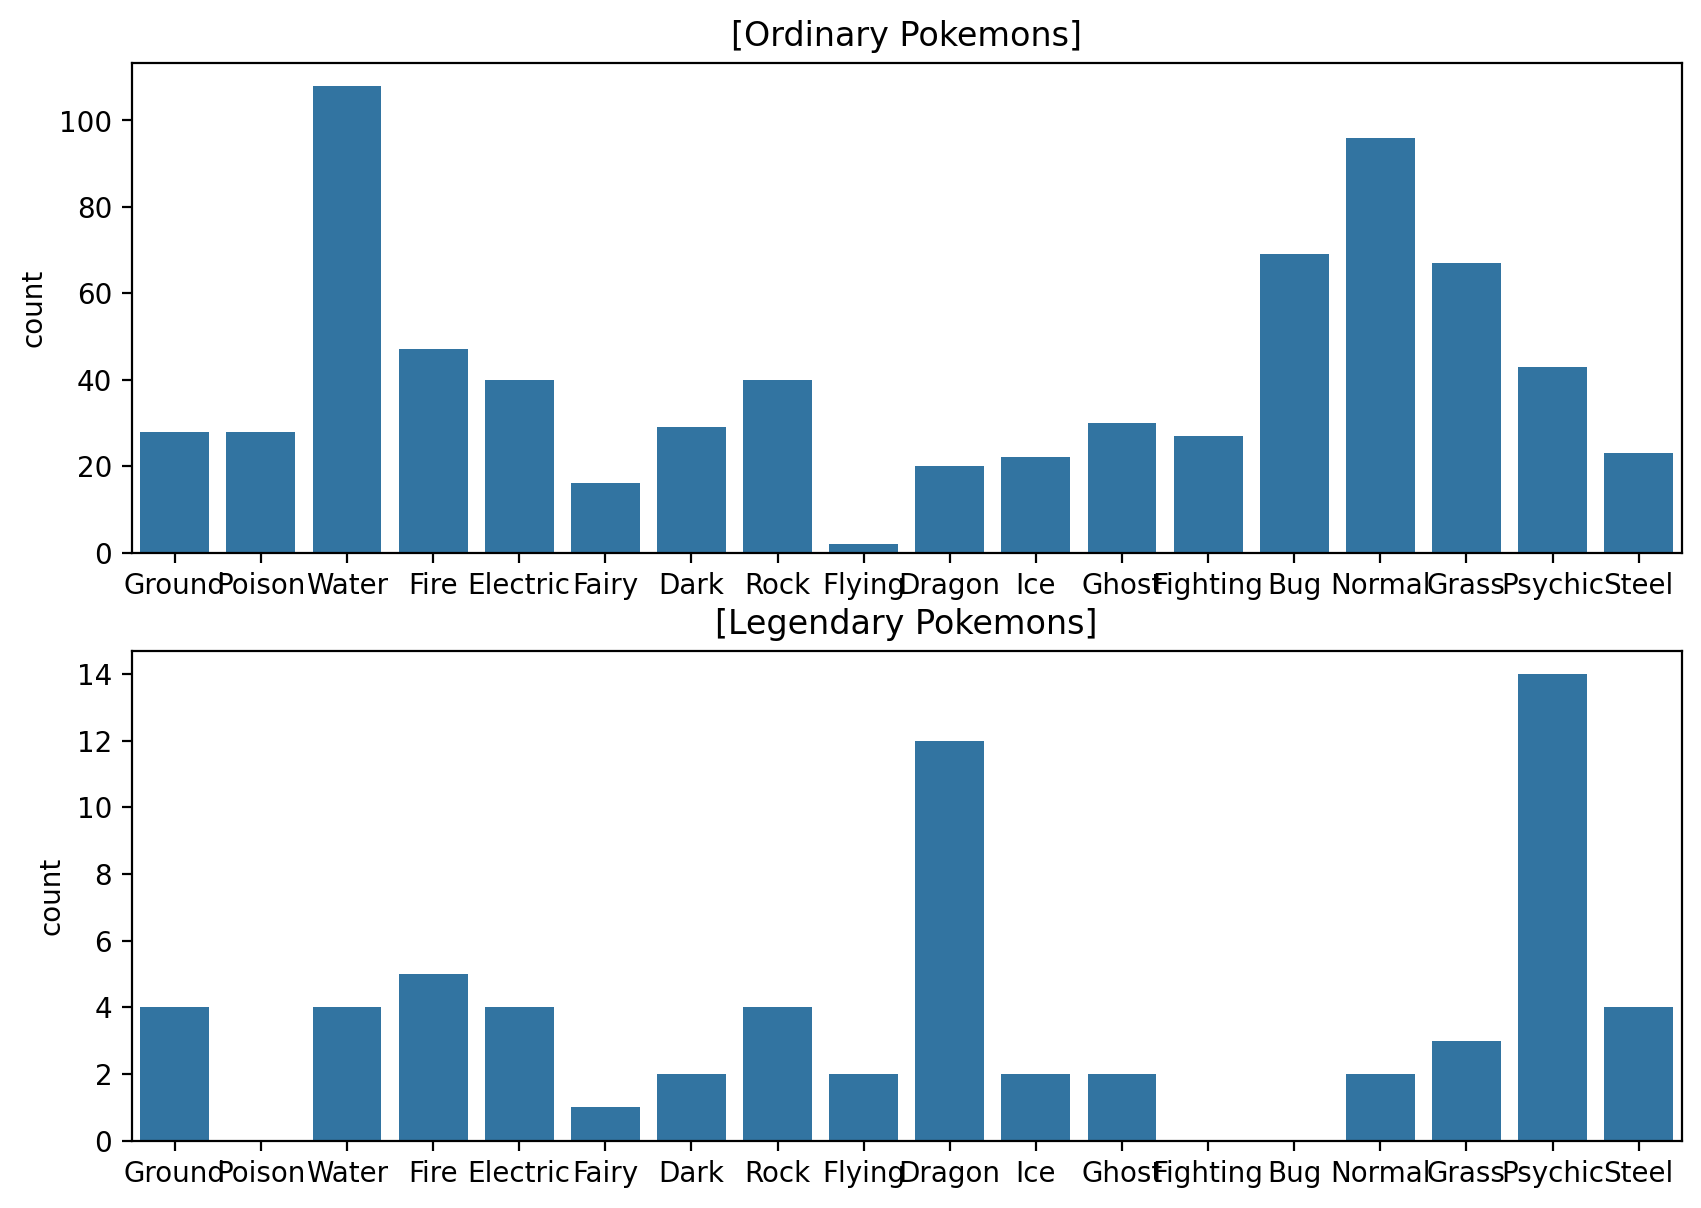

In [33]:
plt.figure(figsize=(10, 7))                                                       # 그래프의 전체 크기를 가로 10, 세로 7로 설정

plt.subplot(211)                                                                  # 2행 1열 중 첫 번째 위치에 서브플롯 생성
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')              # 일반 포켓몬의 Type 1 분포를 막대 그래프로 표시
plt.title("[Ordinary Pokemons]")                                                  # 첫 번째 그래프의 제목 설정

plt.subplot(212)                                                                  # 2행 1열 중 두 번째 위치에 서브플롯 생성
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')             # 전설의 포켓몬의 Type 1 분포를 막대 그래프로 표시
plt.title("[Legendary Pokemons]")                                                 # 두 번째 그래프의 제목 설정

plt.show()                                                                        # 그래프 출력

In [35]:
# Type 1을 기준으로 Legendary 값의 평균을 계산하여 피벗 테이블 생성 후, Legendary 비율이 높은 순으로 정렬
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


####Type 2 데이터 분포 plot

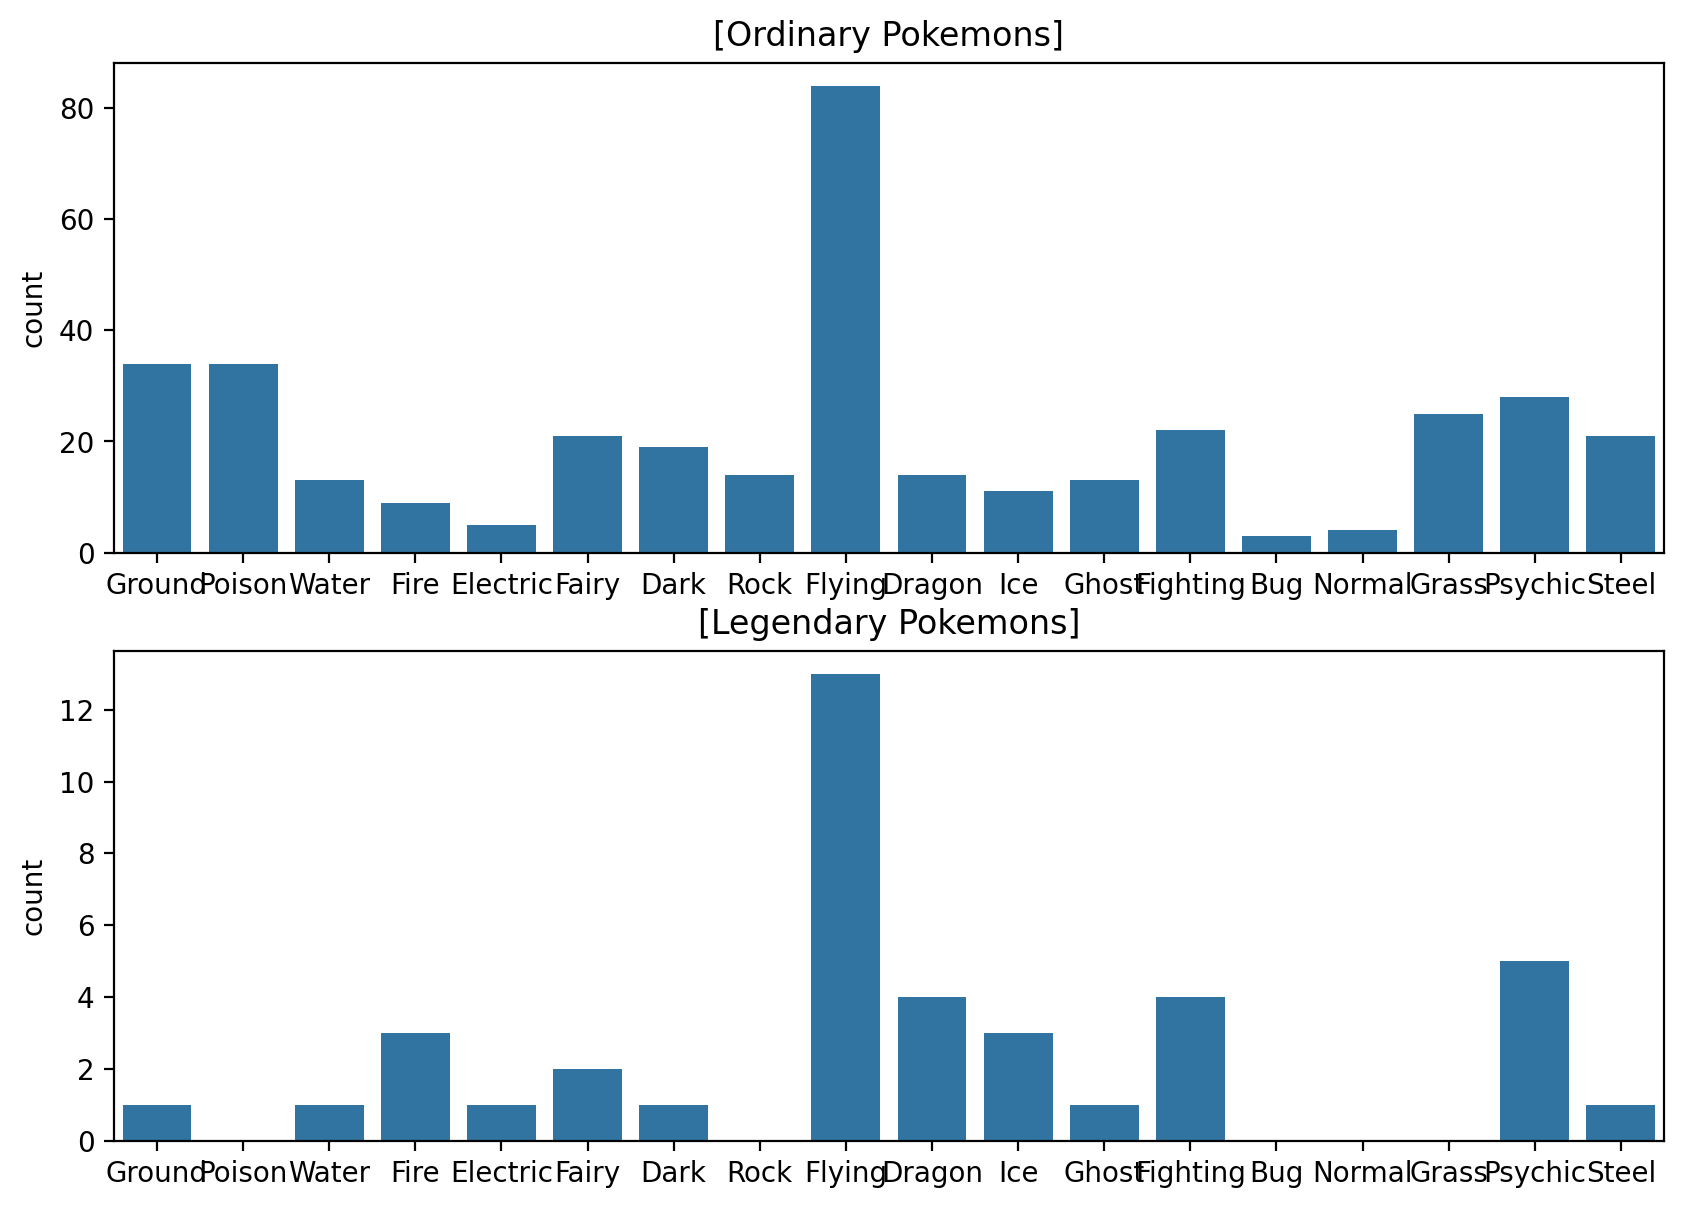

In [156]:
plt.figure(figsize=(10, 7))                                                       # 그래프의 전체 크기를 가로 10, 세로 7로 설정

plt.subplot(211)                                                                  # 2행 1열 중 첫 번째 위치에 서브플롯 생성
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')              # 일반 포켓몬의 Type 2 분포를 막대 그래프로 표시
plt.title("[Ordinary Pokemons]")                                                  # 첫 번째 그래프의 제목 설정

plt.subplot(212)                                                                  # 2행 1열 중 두 번째 위치에 서브플롯 생성
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')             # 전설의 포켓몬의 Type 2 분포를 막대 그래프로 표시
plt.title("[Legendary Pokemons]")                                                 # 두 번째 그래프의 제목 설정

plt.show()                                                                        # 그래프 출력



In [41]:
pd.pivot_table(                                                                   # 데이터를 재구성하여 요약된 통계를 계산하는 함수
    pokemon,                                                                      # 분석할 데이터프레임
    index="Type 2",                                                              # 행 인덱스로 사용할 열
    values="Legendary"                                                           # 계산할 값이 들어있는 열
).sort_values(                                                                   # 데이터프레임을 특정 열의 값을 기준으로 정렬하는 함수
    by=["Legendary"],                                                            # 정렬 기준이 되는 열
    ascending=False                                                              # 내림차순 정렬
)


,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


###(4) 모든 스탯의 총합

####Total : 모든 스탯의 총합

#####스탯 컬럼

In [42]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]              # 포켓몬의 기본 능력치들을 담은 리스트 생성
stats                                                                           # 생성된 능력치 리스트 출력


['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

#####능력치 살펴보기

In [44]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])                                    # 인덱스 0번 포켓몬의 이름을 출력
print("total: ", int(pokemon.loc[0, "Total"]))                                   # 인덱스 0번 포켓몬의 능력치 총합을 출력
print("stats: ", list(pokemon.loc[0, stats]))                                    # 인덱스 0번 포켓몬의 각 능력치 값들을 리스트로 출력
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))                    # 인덱스 0번 포켓몬의 모든 능력치의 합계를 출력


#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


#####Total 값과 능력치 합계 비교

In [155]:
matching_pokemon_count = (                                                                         # 일치하는 포켓몬의 수를 저장할 변수 선언
    pokemon["Total"].values ==                                                                     # 각 포켓몬의 Total 컬럼 값을 배열로 가져옴
    pokemon[stats].sum(axis=1).values                                                              # 6가지 능력치의 합계를 계산하여 배열로 만듦
).sum()                                                                                            # Total 값과 능력치 합이 일치하는 경우의 개수를 계산

print(matching_pokemon_count)                                                                      # 결과 출력


800


####Total값에 따른 분포 plot

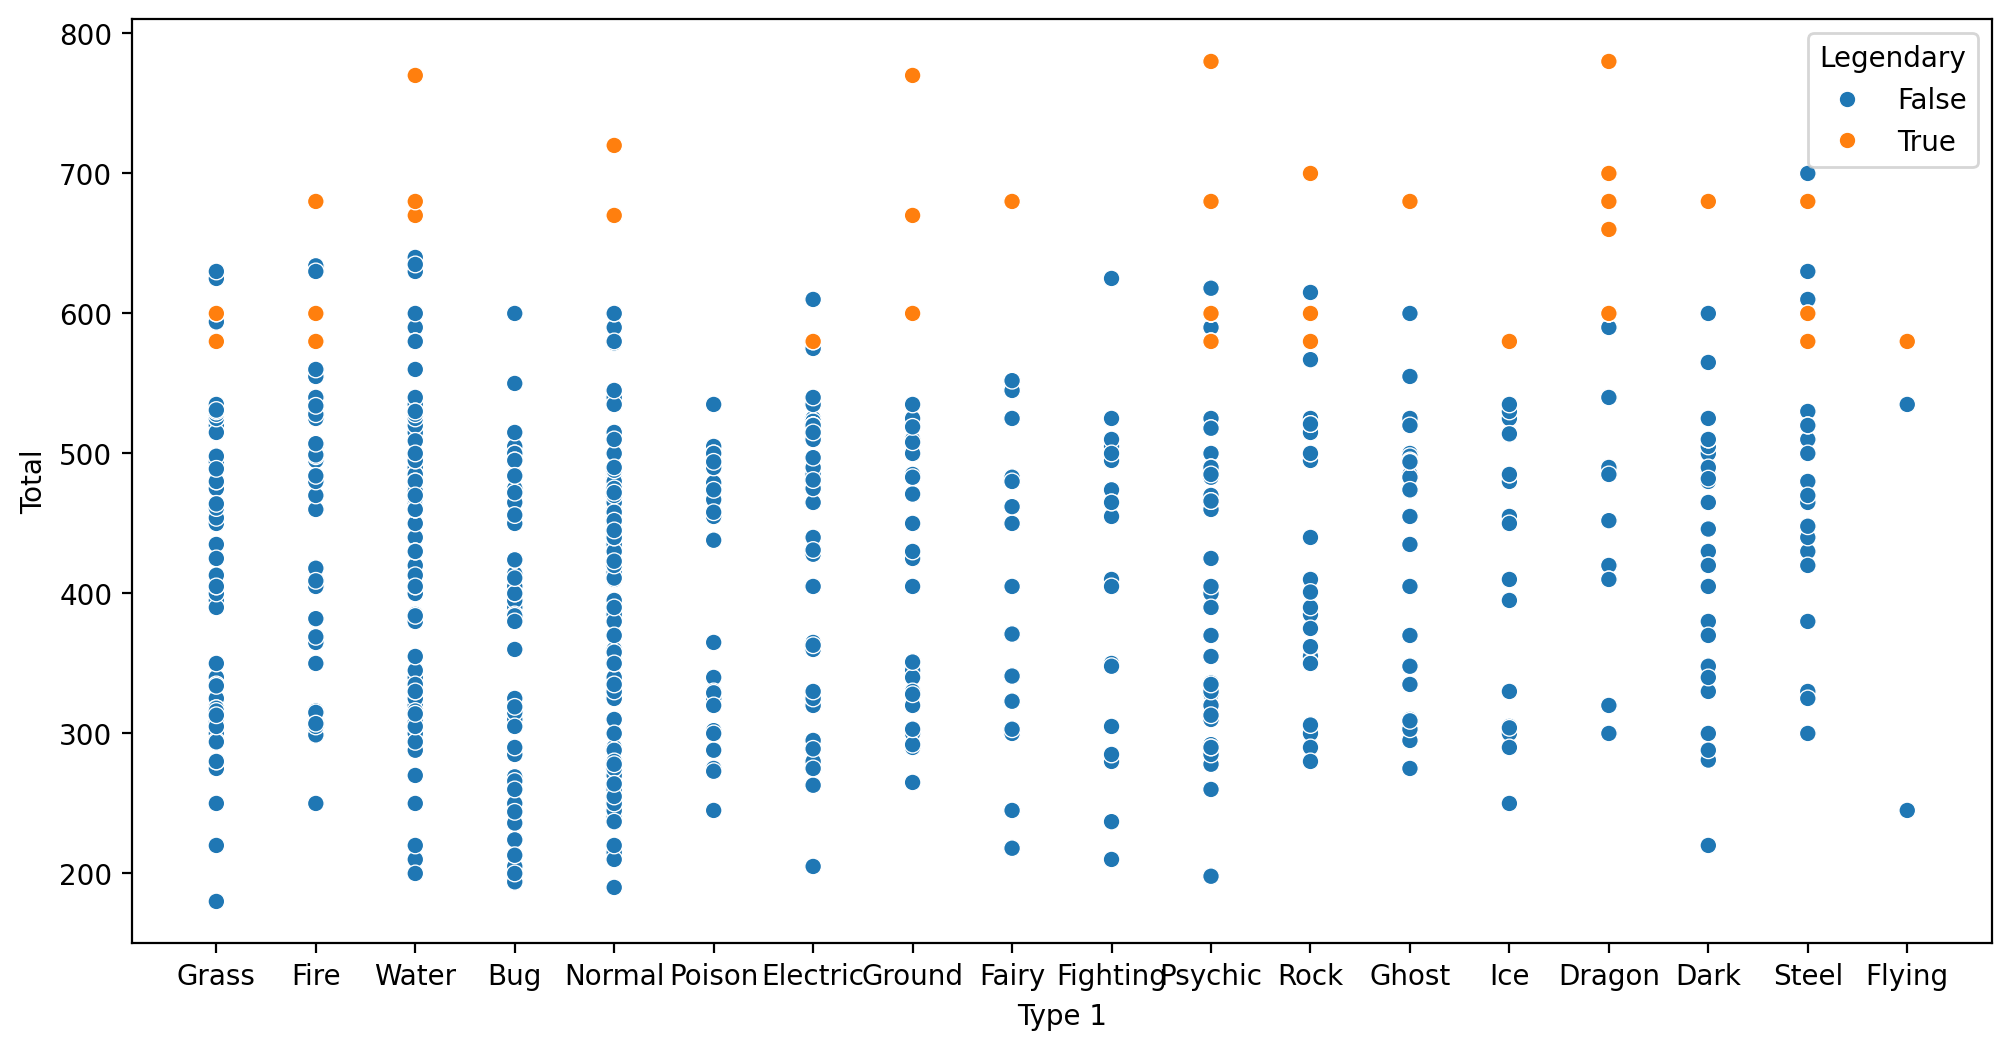

In [48]:
fig, ax = plt.subplots()                                                        # 그래프를 그리기 위한 Figure와 Axes 객체 생성
fig.set_size_inches(12, 6)                                                      # 그래프의 크기를 가로 12인치, 세로 6인치로 설정

sns.scatterplot(
    data=pokemon,                                                               # 사용할 데이터프레임 지정
    x="Type 1",                                                                 # x축에 포켓몬의 첫 번째 타입 지정
    y="Total",                                                                  # y축에 포켓몬의 총 능력치 지정
    hue="Legendary"                                                             # 전설의 포켓몬 여부에 따라 다른 색상으로 표시
)

plt.show()                                                                      # 그래프 출력


###(5) 세부스탯

####세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

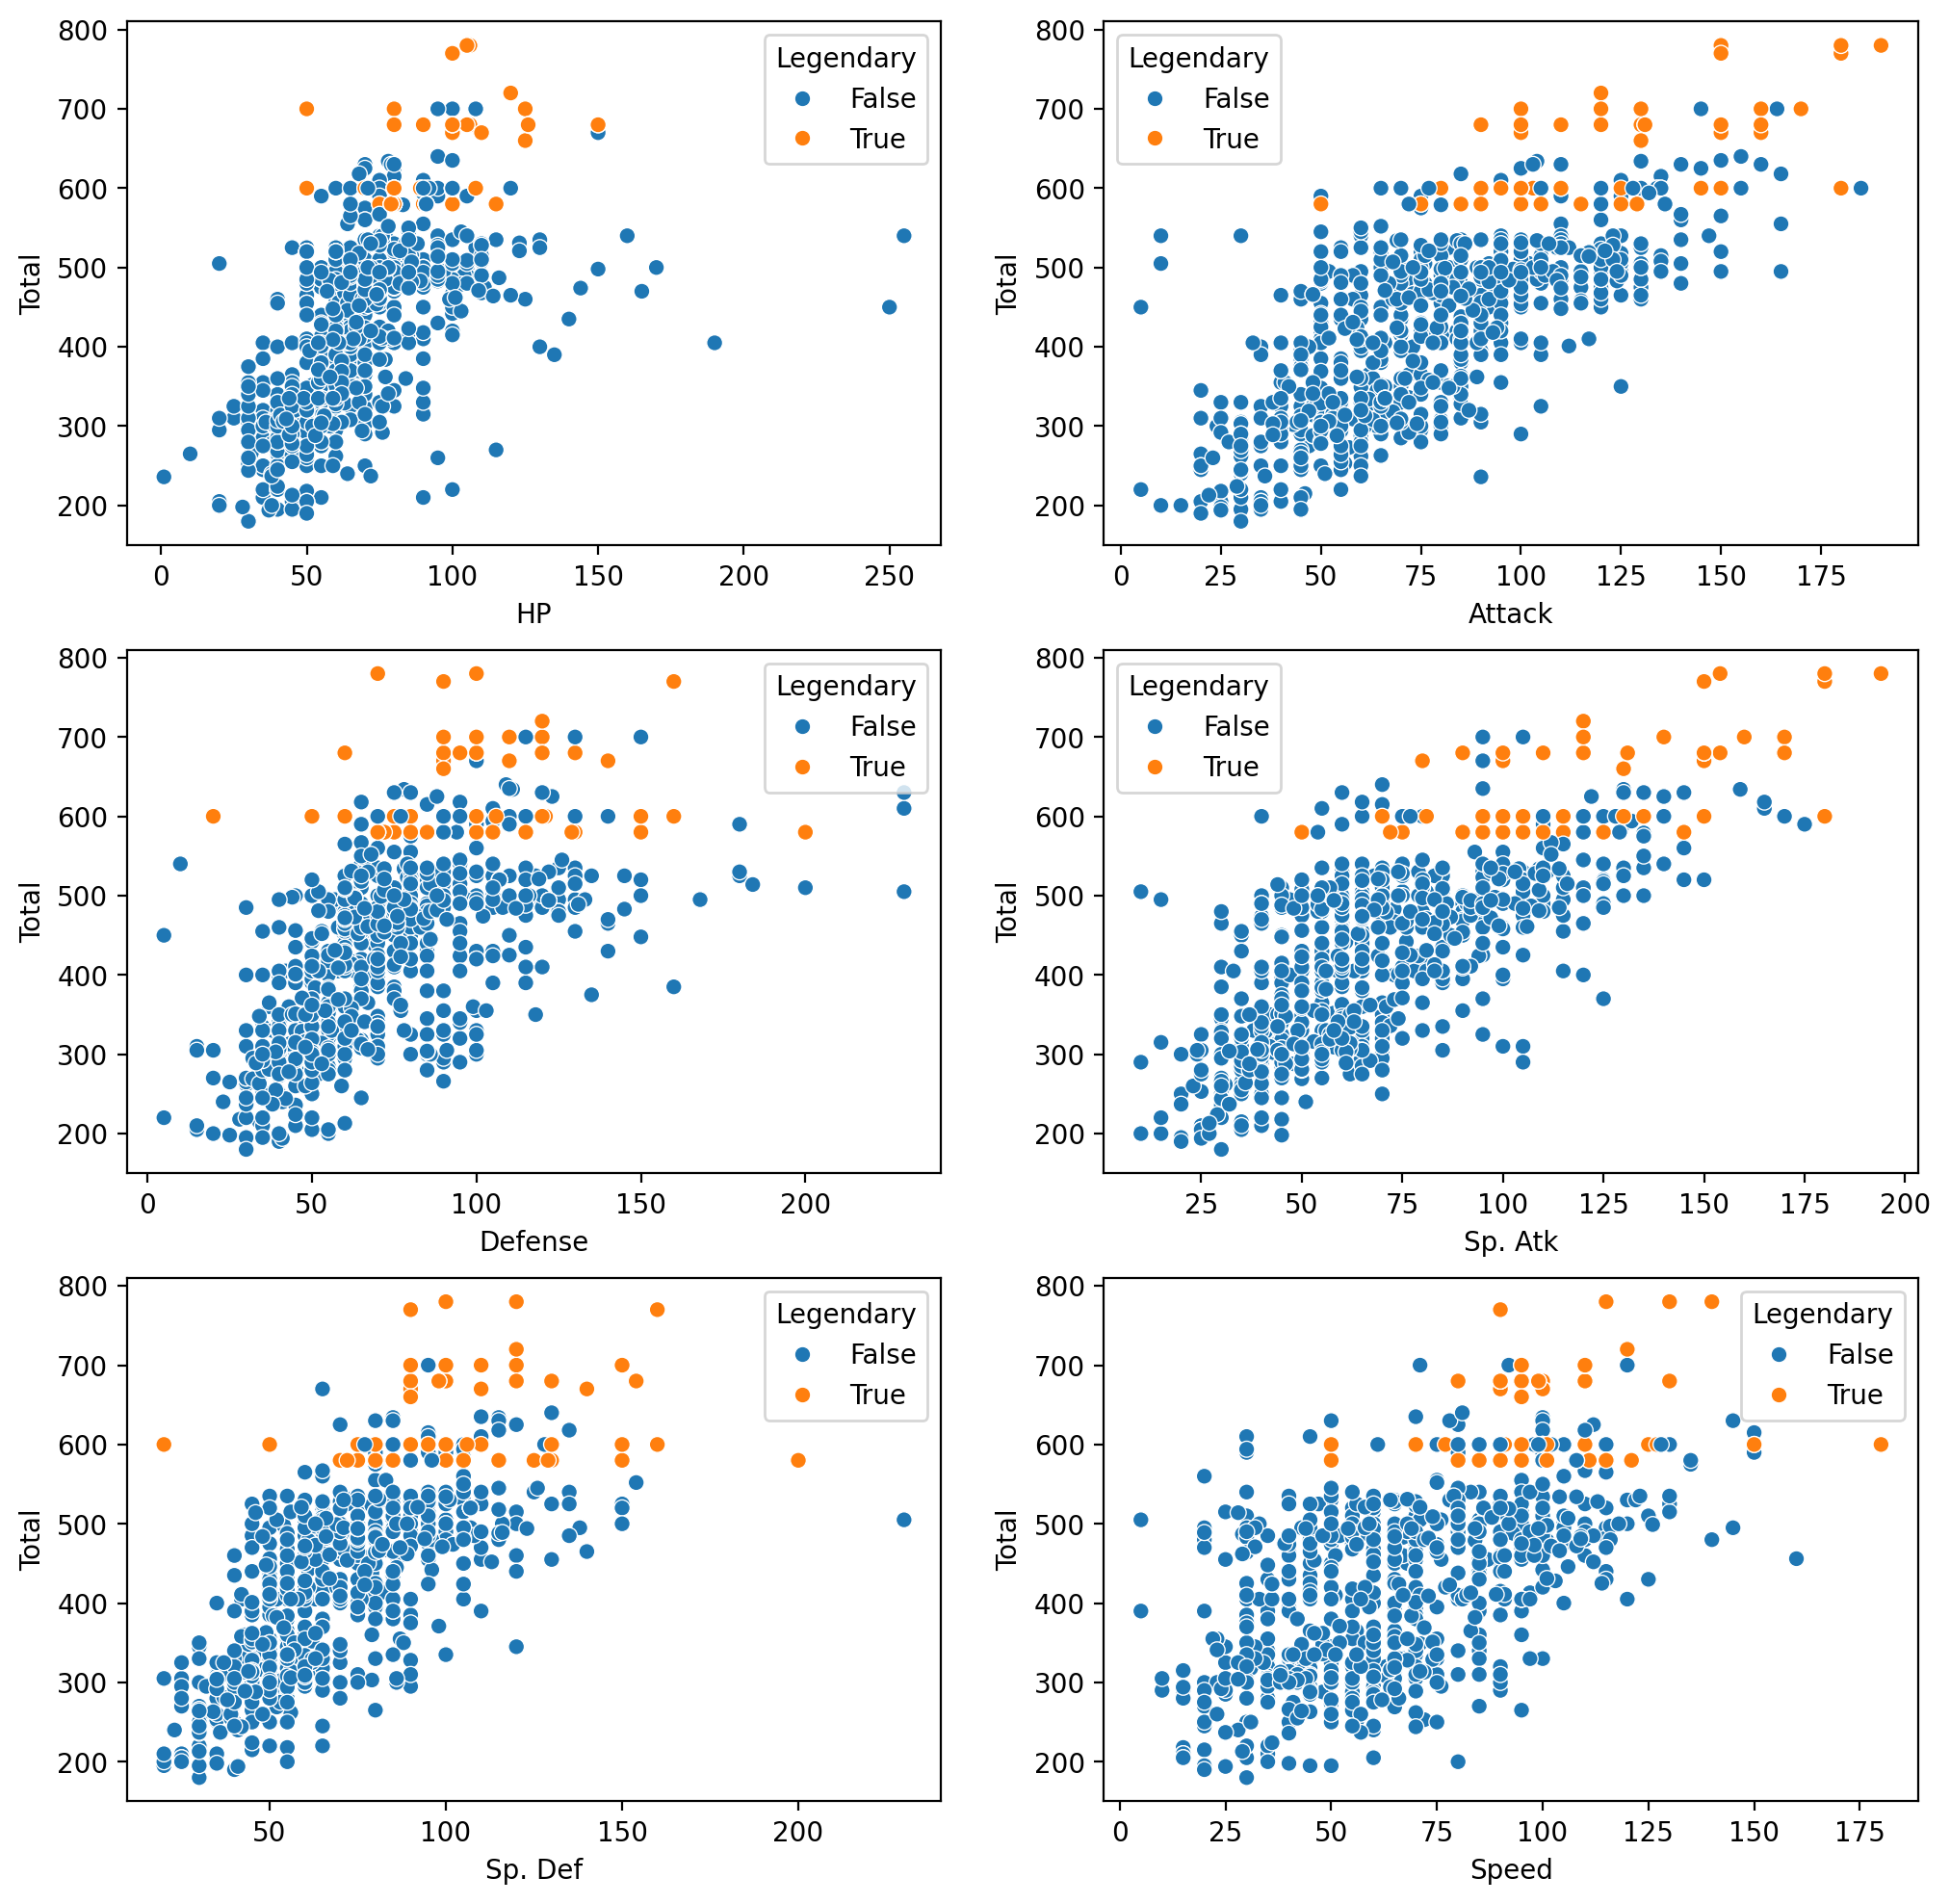

In [53]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)        # 3행 2열의 서브플롯 생성
figure.set_size_inches(12, 12)                                                        # 그래프의 크기를 가로 12인치, 세로 12인치로 설정

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)            # HP와 Total의 관계를 전설여부로 구분하여 표시

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)        # 공격력과 Total의 관계를 전설여부로 구분하여 표시

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)       # 방어력과 Total의 관계를 전설여부로 구분하여 표시

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)       # 특수공격과 Total의 관계를 전설여부로 구분하여 표시

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)       # 특수방어와 Total의 관계를 전설여부로 구분하여 표시

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)         # 스피드와 Total의 관계를 전설여부로 구분하여 표시

plt.show()                                                                           # 그래프 출력


###(6) 세대

####Generation : 포켓몬의 세대

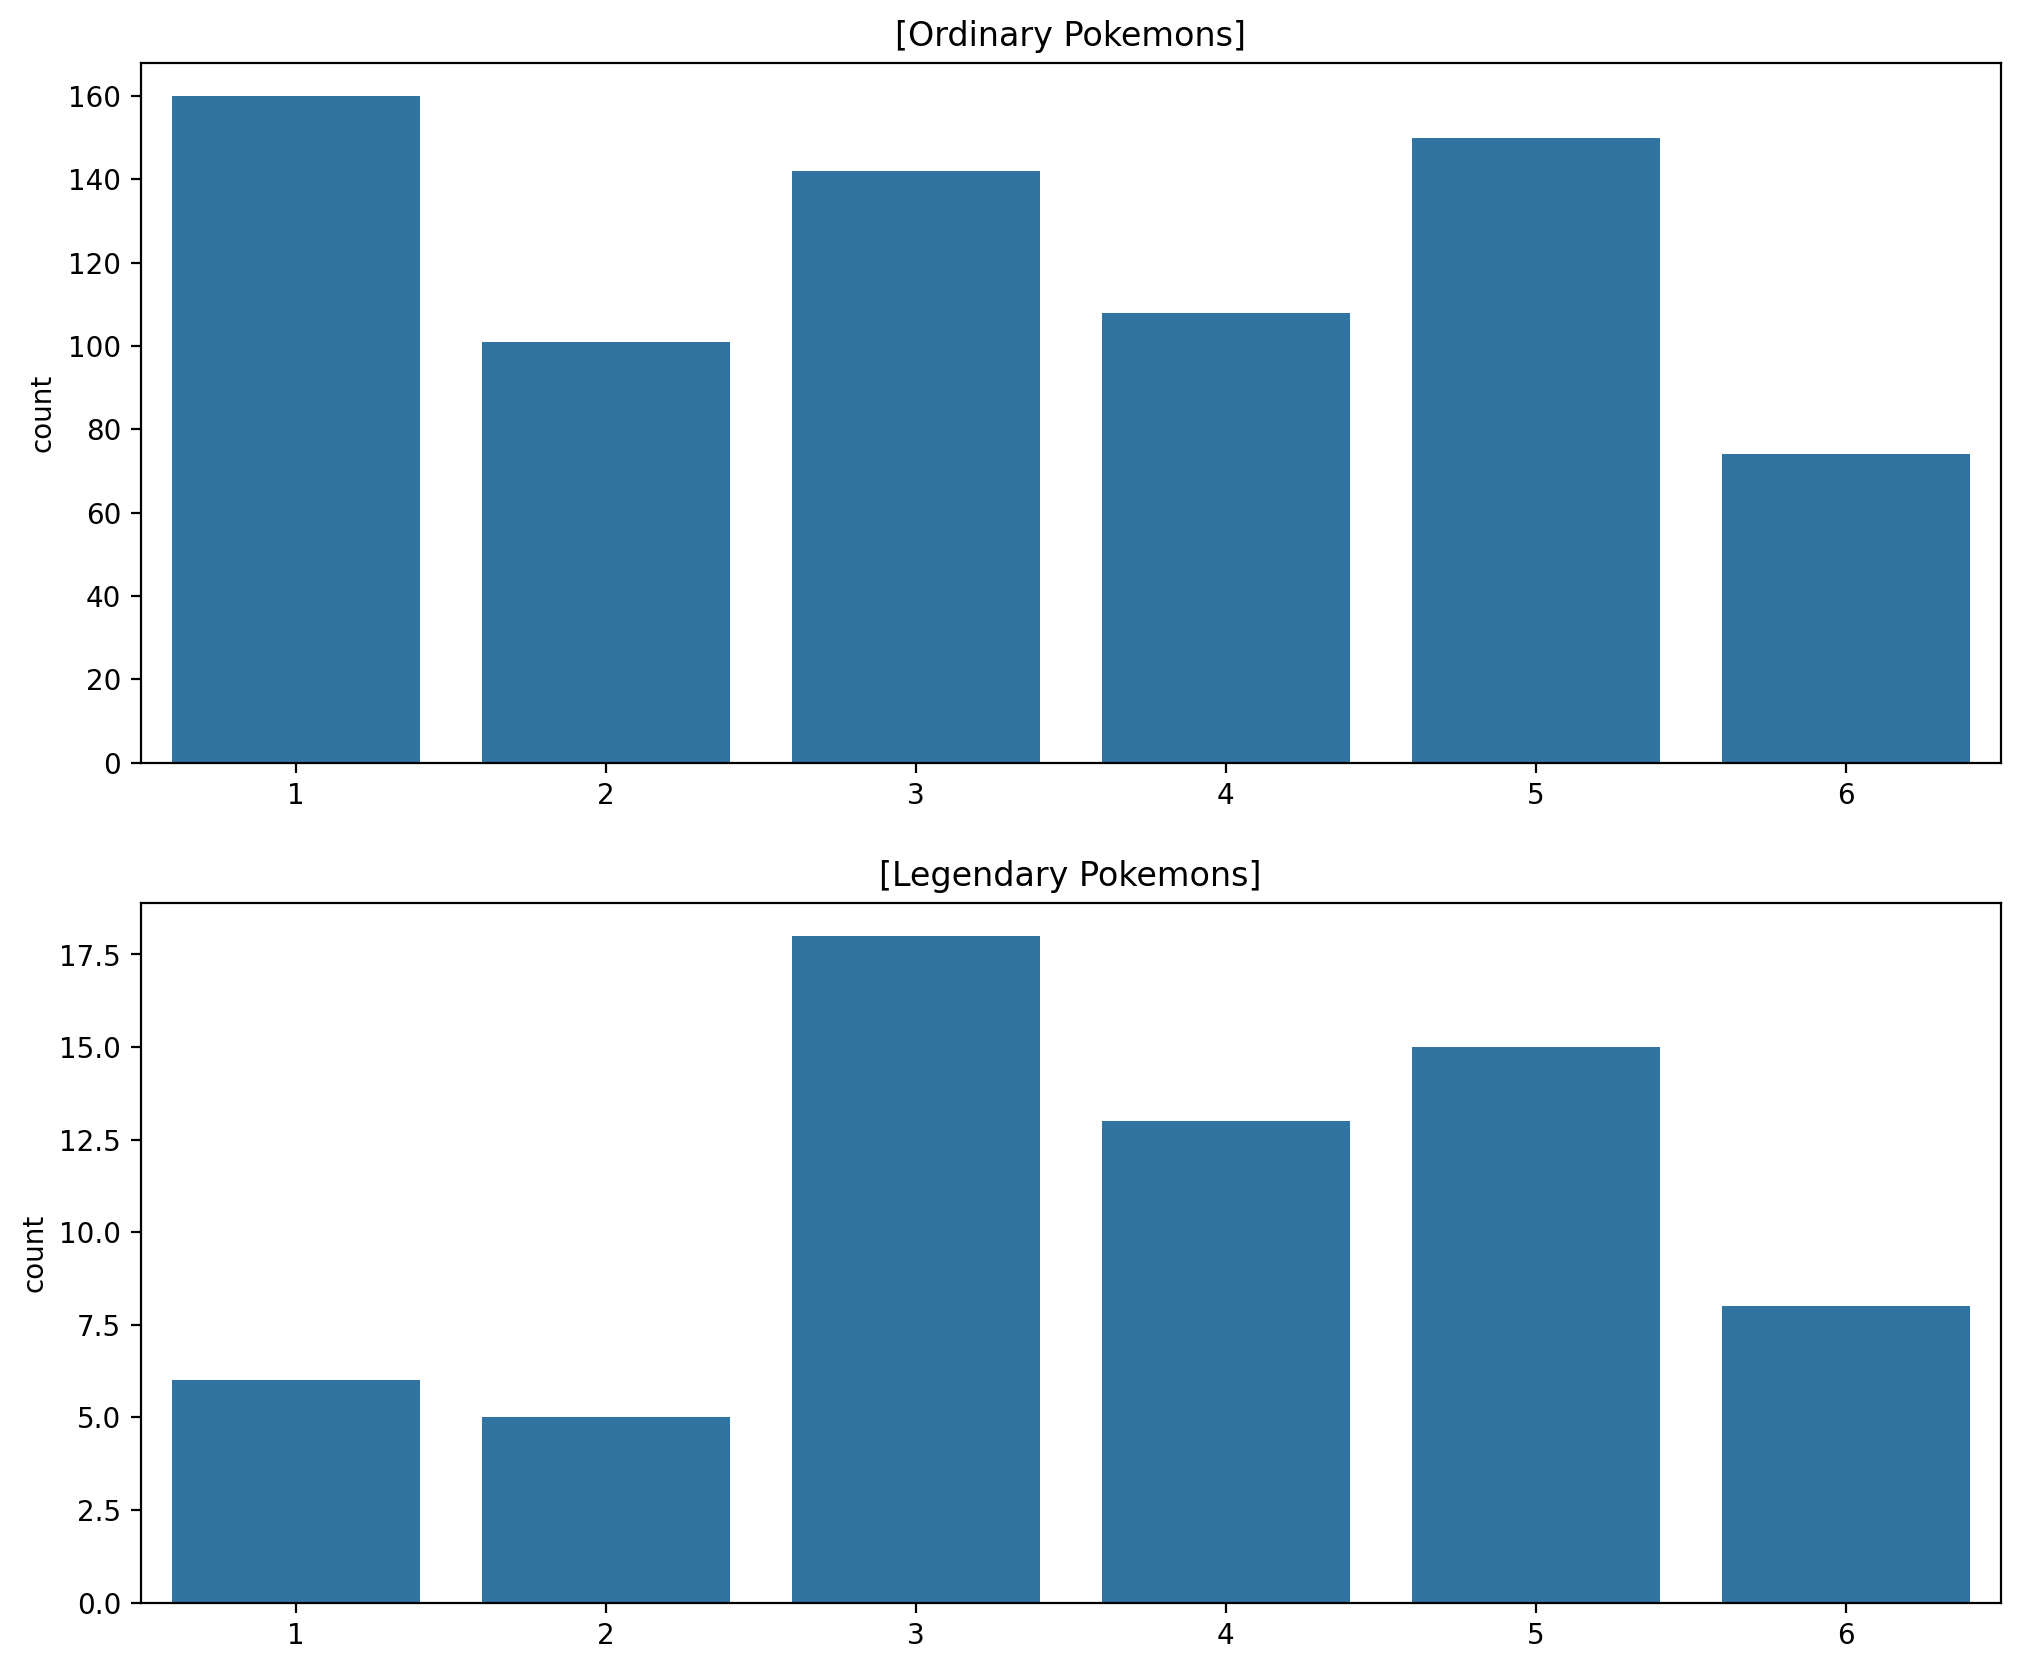

In [54]:
plt.figure(figsize=(12, 10))                                                         # 그래프의 크기를 가로 12인치, 세로 10인치로 설정

plt.subplot(211)                                                                     # 2행 1열 중 첫 번째 위치에 서브플롯 생성
sns.countplot(data=ordinary, x="Generation").set_xlabel('')                          # 일반 포켓몬의 세대별 분포를 막대 그래프로 표시
plt.title("[Ordinary Pokemons]")                                                     # 첫 번째 그래프의 제목 설정

plt.subplot(212)                                                                     # 2행 1열 중 두 번째 위치에 서브플롯 생성
sns.countplot(data=legendary, x="Generation").set_xlabel('')                         # 전설의 포켓몬의 세대별 분포를 막대 그래프로 표시
plt.title("[Legendary Pokemons]")                                                    # 두 번째 그래프의 제목 설정

plt.show()                                                                           # 그래프 출력

### 전설과 일반의 차이

####(1) Total 값

##### 전설 포켓몬

######Total값 분포

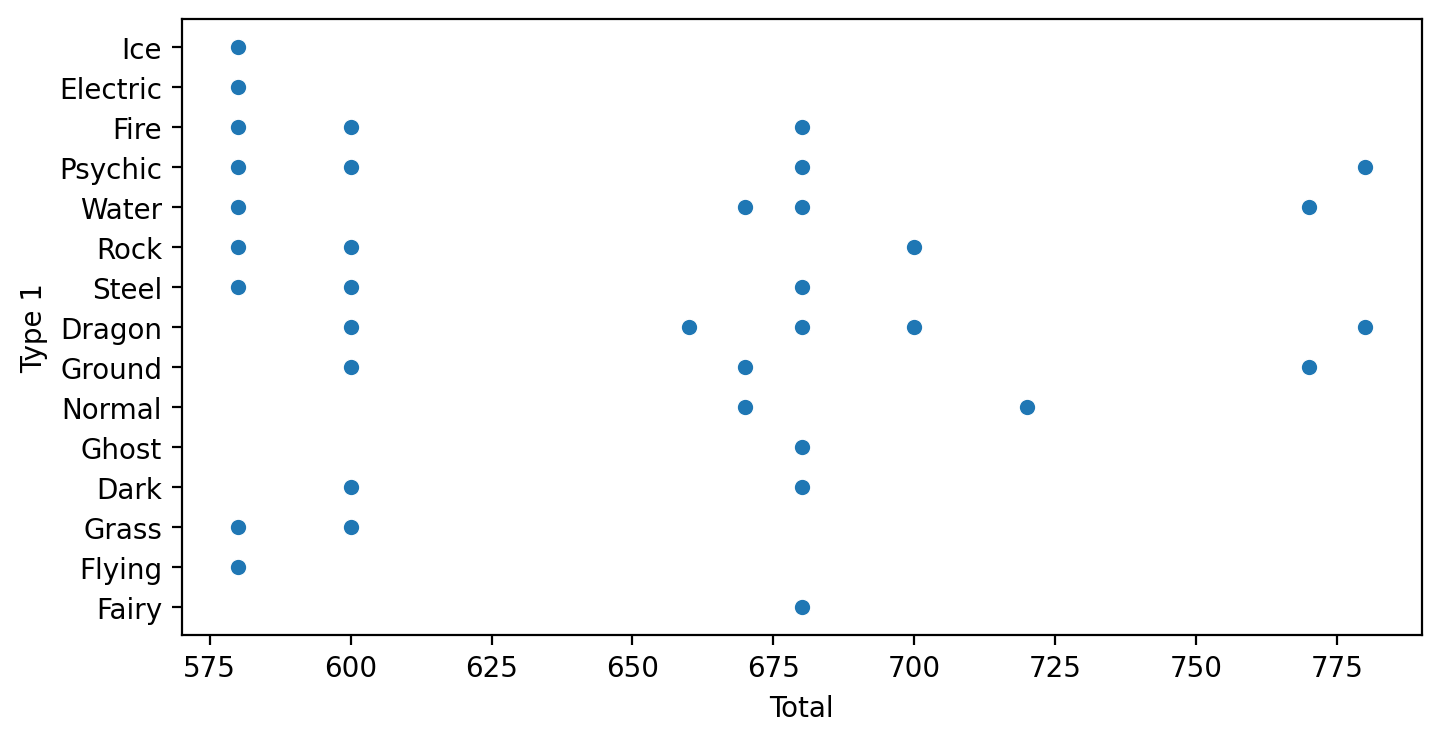

In [55]:
fig, ax = plt.subplots()                                                        # Figure와 Axes 객체 생성
fig.set_size_inches(8, 4)                                                       # 그래프의 크기를 가로 8인치, 세로 4인치로 설정

sns.scatterplot(data=legendary, y="Type 1", x="Total")                          # 전설의 포켓몬의 타입별 총 능력치를 산점도로 표시

plt.show()                                                                      # 그래프 출력

###### Total값 오름차순 정렬

In [56]:
print(sorted(list(set(legendary["Total"]))))                                         # 전설의 포켓몬들의 고유한 Total 값들을 오름차순으로 정렬하여 출력

[580, 600, 660, 670, 680, 700, 720, 770, 780]


######빈도수 그래프

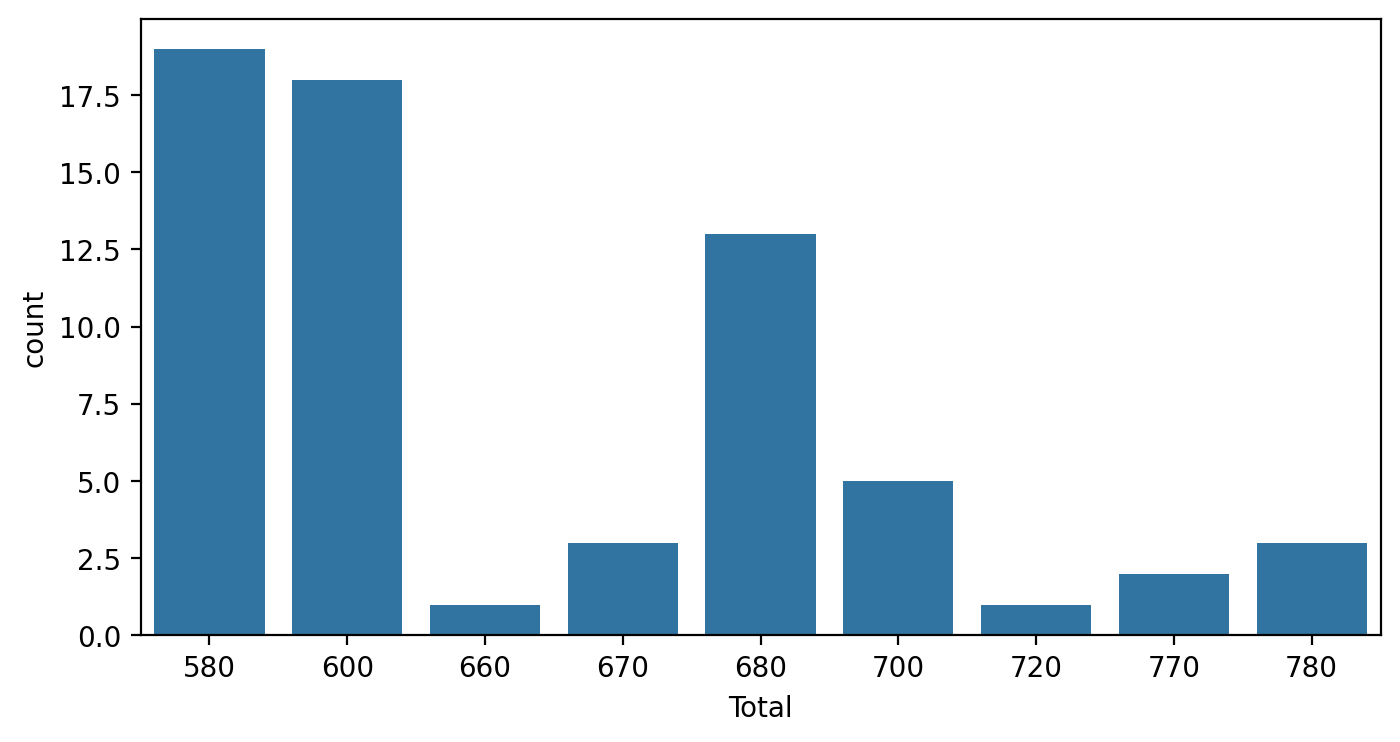

In [57]:
fig, ax = plt.subplots()                                                        # Figure와 Axes 객체 생성
fig.set_size_inches(8, 4)                                                       # 그래프의 크기를 가로 8인치, 세로 4인치로 설정

sns.countplot(data=legendary, x="Total")                                        # 전설의 포켓몬의 Total 값별 빈도수를 막대 그래프로 표시

plt.show()                                                                      # 그래프 출력

###### 동일한 Total값 예상 개체

In [58]:
round(65 / 9, 2)                                                                # 65를 9로 나눈 값을 소수점 2자리에서 반올림하여 계산

7.22

#####일반 포켓몬

###### Total값 오름차순 정렬

In [59]:
print(sorted(list(set(ordinary["Total"]))))                                         # 일반 포켓몬들의 고유한 Total 값들을 오름차순으로 정렬하여 출력

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


######Total값 개수

In [60]:
len(set(ordinary["Total"]))                                                         # 일반 포켓몬들의 고유한 Total 값들의 개수를 계산하여 출력

195

######동일한 Total값 예상 개채

In [61]:
round(735 / 195, 2)                                                              # 735를 195로 나눈 값을 소수점 2자리에서 반올림 하여 계산

3.77

#####예상

Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것
(높은수치, 분포)

####(2) 이름

In [62]:
n1, n2, n3, n4, n5 = (                                                            # 전설의 포켓몬 데이터에서 여러 구간의 데이터를 변수에 할당 시작
    legendary[3:6],                                                               # 인덱스 3~5 구간의 데이터 추출
    legendary[14:24],                                                            # 인덱스 14~23 구간의 데이터 추출
    legendary[25:29],                                                            # 인덱스 25~28 구간의 데이터 추출
    legendary[46:50],                                                            # 인덱스 46~49 구간의 데이터 추출
    legendary[52:57]                                                             # 인덱스 52~56 구간의 데이터 추출
)                                                                                # 변수 할당 완료

names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)                   # 추출한 데이터들을 하나로 연결하고 인덱스를 초기화

names                                                                            # 최종 결합된 데이터프레임 출력

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [63]:
formes = names[13:23]                                                            # names 데이터프레임에서 13번째부터 22번째까지의 데이터를 추출
formes                                                                           # 추출된 데이터프레임 출력

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


#####전설 이름 길이 칼럼

In [64]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))               # 전설의 포켓몬 각각의 이름 길이를 계산하여 name_count 컬럼에 저장
legendary.head()                                                                  # 수정된 데이터프레임의 앞부분 5행을 출력

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


#####일반 이름 길이 칼럼

In [65]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))               # 일반 포켓몬 각각의 이름 길이를 계산하여 name_count 컬럼에 저장
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


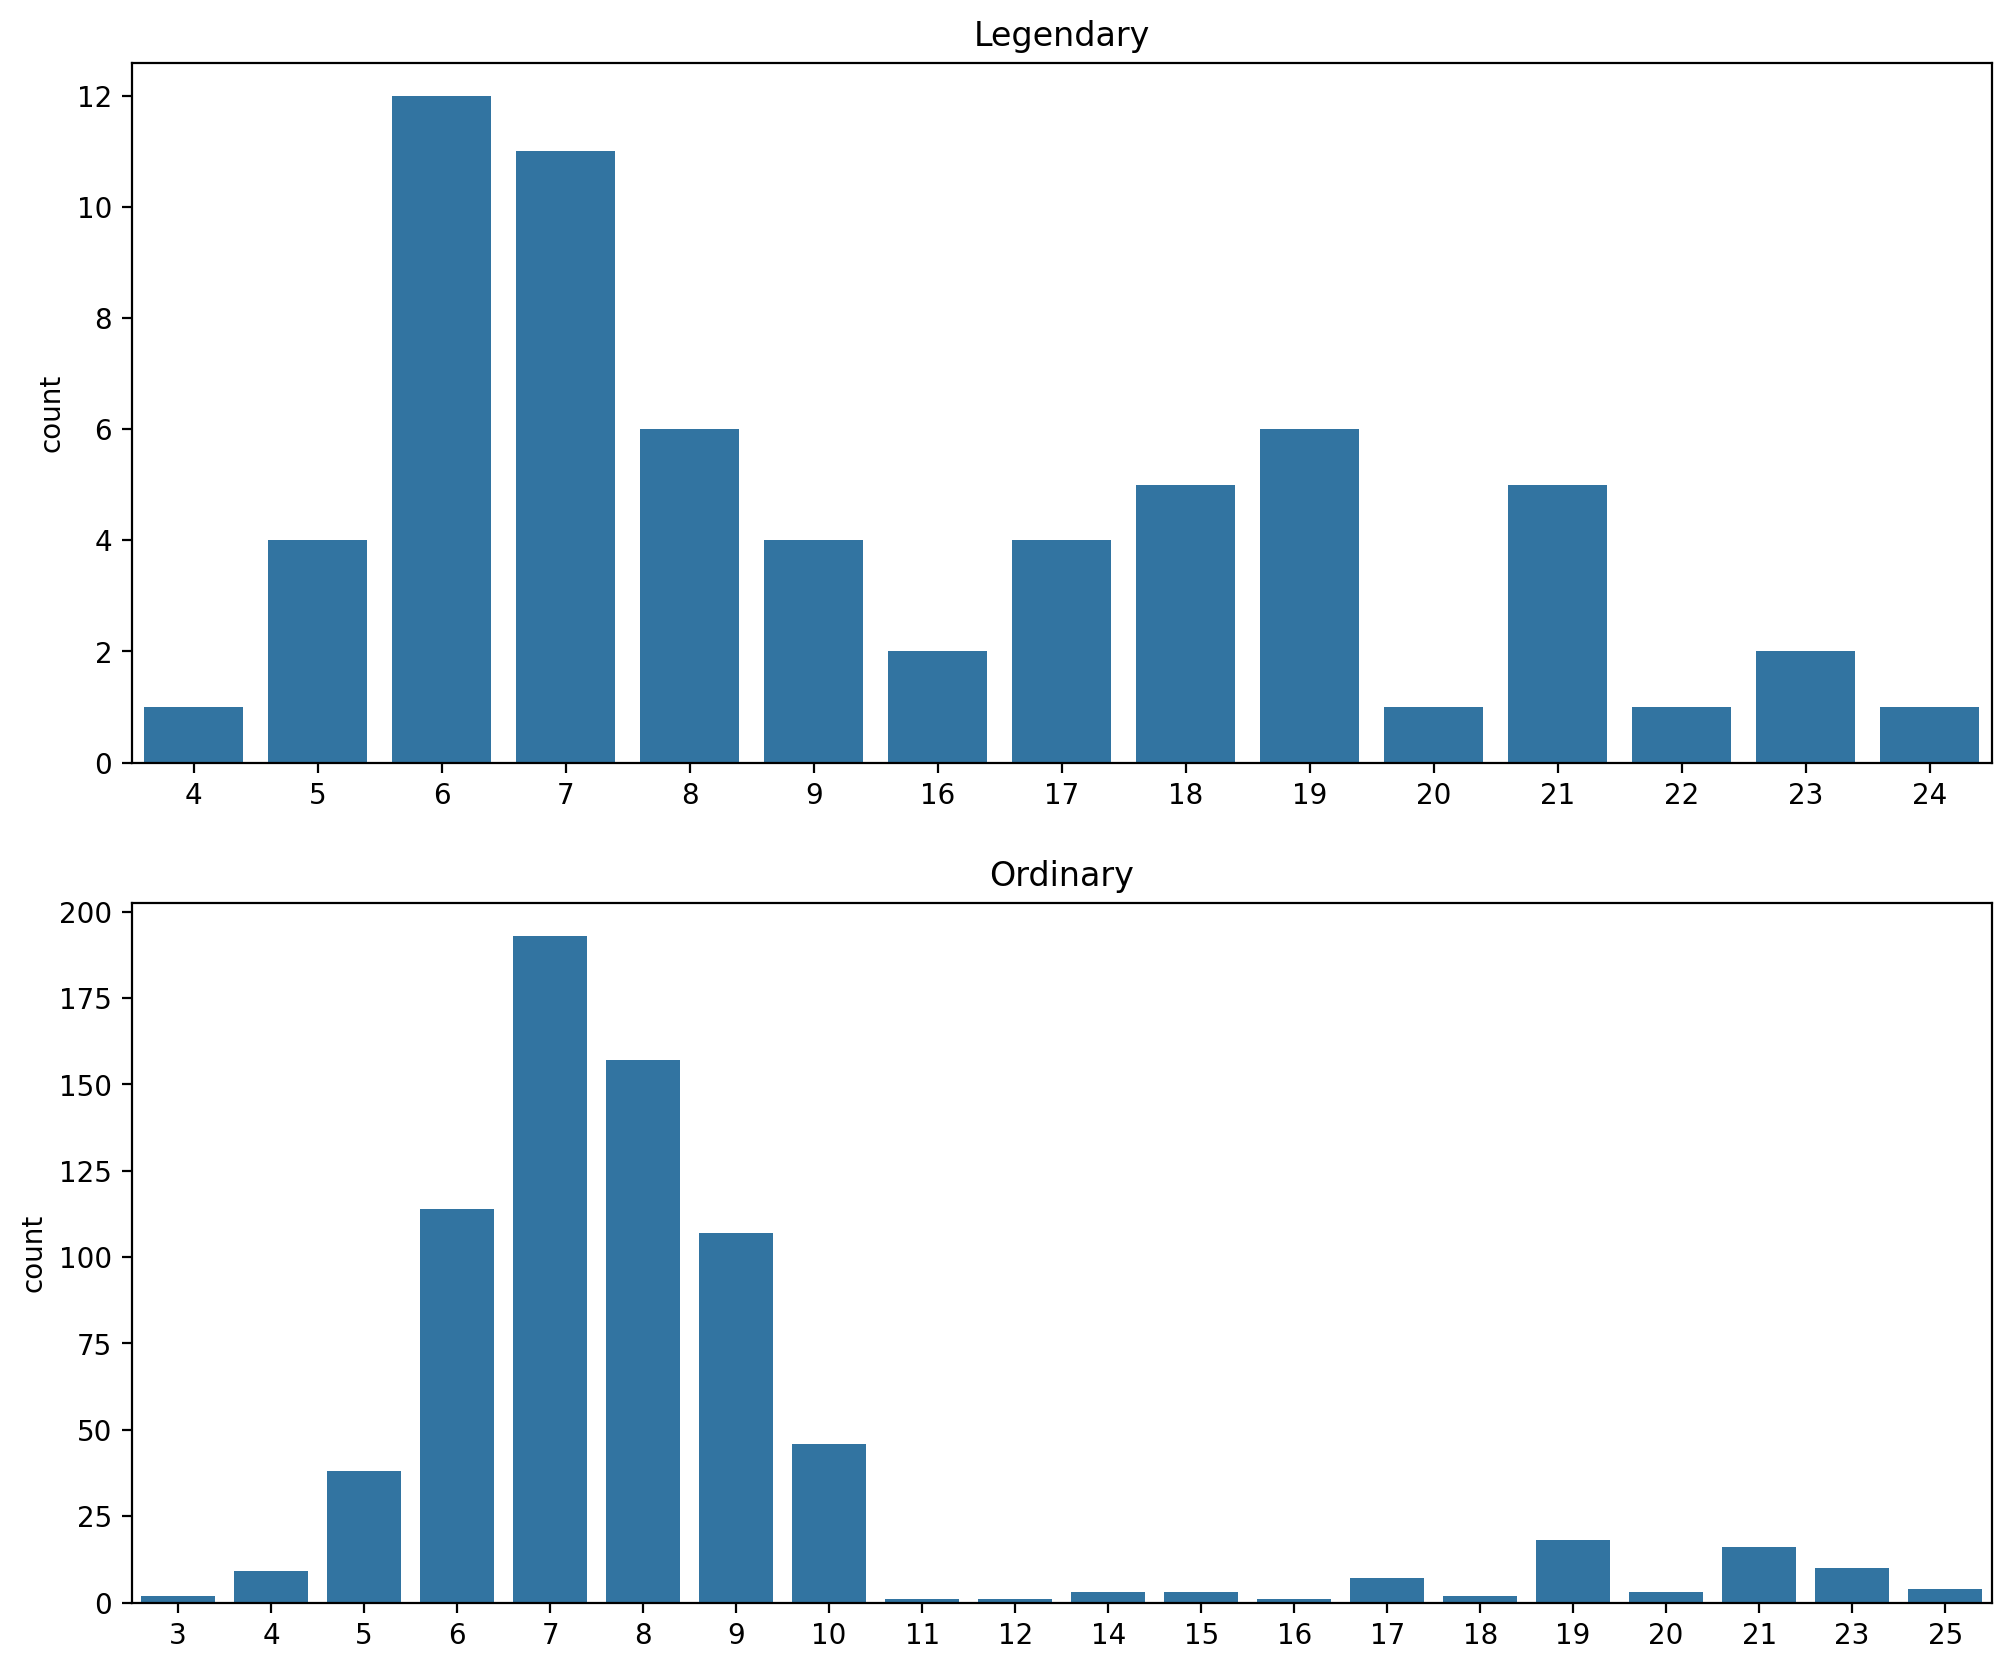

In [66]:
plt.figure(figsize=(12, 10))                                                         # 그래프의 크기를 가로 12인치, 세로 10인치로 설정

plt.subplot(211)                                                                     # 2행 1열 중 첫 번째 위치에 서브플롯 생성
sns.countplot(data=legendary, x="name_count").set_xlabel('')                         # 전설의 포켓몬 이름 길이별 빈도수를 막대 그래프로 표시
plt.title("Legendary")                                                              # 첫 번째 그래프의 제목 설정

plt.subplot(212)                                                                     # 2행 1열 중 두 번째 위치에 서브플롯 생성
sns.countplot(data=ordinary, x="name_count").set_xlabel('')                          # 일반 포켓몬 이름 길이별 빈도수를 막대 그래프로 표시
plt.title("Ordinary")                                                               # 두 번째 그래프의 제목 설정

plt.show()                                                                          # 그래프 출력

In [67]:
# 이름 길이가 9보다 큰 전설의 포켓몬 비율을 백분율로 계산하여 소수점 2자리까지 출력
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [69]:
# 이름 길이가 10 이상인 일반 포켓몬 비율을 백분율로 계산하여 소수점 2자리까지 출력
print(round(len(ordinary[ordinary["name_count"] >= 10]) / len(ordinary) * 100, 2), "%")

15.65 %


#####예상

적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!

전설의 포켓몬은 긴 이름을 가졌을 확률이 높다!

###데이터 전처리

####(1) 이름의 길이가 10 이상인가 아닌가


In [70]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))                    # 모든 포켓몬의 이름 길이를 계산하여 name_count 컬럼에 저장
pokemon.head()                                                                    # 수정된 데이터프레임의 앞부분 5행을 출력

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [71]:
pokemon["long_name"] = pokemon["name_count"] >= 10                               # 이름 길이가 10 이상인 포켓몬은 True, 미만인 포켓몬은 False로 표시하는 long_name 컬럼 생성
pokemon.head()                                                                  # 수정된 데이터프레임의 앞부분 5행을 출력

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


####(2) 이름에 자주 쓰이는 토큰 추출

In [72]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))        # 포켓몬 이름에서 공백을 제거하여 Name_nospace 컬럼에 저장
pokemon.tail()                                                                      # 수정된 데이터프레임의 마지막 5행을 출력

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [73]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())      # 공백이 제거된 포켓몬 이름이 알파벳으로만 구성되어있는지 확인하여 True/False로 저장
pokemon.head()                                                                     # 수정된 데이터프레임의 앞부분 5행을 출력

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [74]:
print(pokemon[pokemon["name_isalpha"] == False].shape)                            # 이름이 알파벳으로만 구성되지 않은 포켓몬의 데이터 형태(행,열 개수) 출력
pokemon[pokemon["name_isalpha"] == False]                                        # 이름이 알파벳으로만 구성되지 않은 포켓몬들의 정보를 출력

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [75]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")                # ♀ 기호가 포함된 Nidoran을 Nidoran X로 변경
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")                # ♂ 기호가 포함된 Nidoran을 Nidoran Y로 변경
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")              # 아포스트로피가 포함된 Farfetch'd를 Farfetchd로 변경
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")                  # 마침표가 포함된 Mr. Mime을 Mr Mime으로 변경
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")              # 숫자가 포함된 Porygon2를 Porygon Two로 변경
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")                       # 하이픈이 포함된 Ho-oh를 Ho Oh로 변경
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")                  # 마침표가 포함된 Mime Jr.을 Mime Jr로 변경
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")              # 하이픈이 포함된 Porygon-Z를 Porygon Z로 변경
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")    # 특수문자가 포함된 Zygarde50% Forme을 Zygarde Forme으로 변경

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]                          # 변경된 이름을 가진 특정 인덱스의 포켓몬 정보를 출력

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [76]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))        # 포켓몬 이름에서 공백을 제거하여 Name_nospace 컬럼에 저장
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())      # 공백이 제거된 포켓몬 이름이 알파벳으로만 구성되어있는지 확인
pokemon[pokemon["name_isalpha"] == False]                                          # 이름이 알파벳으로만 구성되지 않은 포켓몬들의 정보를 출력

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


In [78]:
import re                                                                            # 정규표현식을 사용하기 위한 re 모듈 임포트

In [79]:
name = "CharizardMega Charizard X"

In [83]:
name_split = name.split(" ")                                                        # 문자열을 공백(" ") 기준으로 분리하여 리스트로 저장
name_split                                                                         # 분리된 문자열 리스트 출력

['CharizardMega', 'Charizard', 'X']

In [84]:
temp = name_split[0]                                                                # 공백으로 분리된 이름 리스트의 첫 번째 요소를 temp 변수에 저장
temp                                                                               # temp 변수에 저장된 값 출력

'CharizardMega'

In [86]:
tokens = re.findall('[A-Z][a-z]*', temp)                                          # 정규표현식을 사용하여 문자열을 토큰화:
                                                                                  # [A-Z]: 대문자로 시작
                                                                                  # [a-z]*: 그 뒤에 소문자가 1개 이상 나오는 패턴
                                                                                  # findall()은 이 패턴과 일치하는 모든 부분을 찾아 리스트로 반환
tokens                                                                            # 토큰화된 결과 출력

['Charizard', 'Mega']

In [87]:
tokens = []                                                                         # 토큰을 저장할 빈 리스트 생성
for part_name in name_split:                                                       # 공백으로 분리된 이름의 각 부분에 대해 반복
    a = re.findall('[A-Z][a-z]*', part_name)                                      # 각 부분에서 대문자로 시작하는 단어들을 찾아 리스트로 저장
    tokens.extend(a)                                                               # 찾은 단어들을 tokens 리스트에 추가 (extend는 리스트를 이어붙임)
tokens                                                                            # 최종적으로 생성된 토큰 리스트 출력

['Charizard', 'Mega', 'Charizard', 'X']

In [88]:
def tokenize(name):
    name_split = name.split(" ")                                                   # 이름을 공백 기준으로 분리
    tokens = []                                                                    # 토큰을 저장할 빈 리스트 생성
    for part_name in name_split:                                                  # 분리된 각 부분에 대해 반복
        a = re.findall('[A-Z][a-z]*', part_name)                                 # 대문자로 시작하고 소문자가 이어지는 패턴의 단어들을 찾음
        tokens.extend(a)                                                          # 찾은 단어들을 tokens 리스트에 추가

    return np.array(tokens)                                                       # 토큰들을 numpy 배열로 변환하여 반환

In [89]:
name = "CharizardMega Charizard X"                                                 # 토큰화할 포켓몬 이름 문자열 저장
tokenize(name)                                                                    # tokenize 함수를 사용하여 이름을 토큰화:

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [90]:
all_tokens = list(legendary["Name"].apply(tokenize).values)                        # 전설의 포켓몬 이름들을 각각 토큰화하여 리스트로 저장
                                                                                  # apply()를 사용하여 모든 이름에 tokenize 함수 적용

token_set = []                                                                    # 모든 토큰을 저장할 빈 리스트 생성
for token in all_tokens:                                                         # 토큰화된 각 이름에 대해 반복
    token_set.extend(token)                                                      # 각 이름의 토큰들을 token_set 리스트에 추가

print(len(set(token_set)))                                                       # 중복을 제거한 고유한 토큰의 개수 출력
print(token_set)                                                                # 전체 토큰 리스트 출력

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [95]:
from collections import Counter                                                  # collections 모듈에서 Counter 클래스를 가져옵니다.

In [101]:
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]                                                 # 리스트 a에 숫자들을 저장합니다.
Counter(a)                                                                      # Counter 함수를 사용하여 리스트 a의 요소들의 빈도수를 계산합니다.

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [102]:
Counter(a).most_common()                                                         # 리스트 a에서 각 요소가 등장한 횟수를 세고, 빈도수가 높은 순서대로 정렬된 리스트를 반환

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [103]:
most_common = Counter(token_set).most_common(10)                                # token_set에서 가장 빈번하게 등장하는 상위 10개의 토큰과 해당 토큰이 등장한 횟수를 튜플 형태로 리스트에 저장합니다.
most_common                                                                     # 위에서 계산된 결과(most_common)를 출력합니다.

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [105]:
for token, _ in most_common:                                                       # 빈도수가 높은 토큰들에 대해 반복
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)                      # 각 포켓몬 이름에 해당 토큰이 포함되어 있는지 확인하여 True/False로 저장
                                                                                  # f-string을 사용하여 컬럼명 생성 (예: "Charizard", "Mega" 등)
pokemon.head(10)                                                                  # 처리된 데이터프레임의 앞부분 10행을 출력

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


####(3) Type1 & 2! 범주형 데이터 전처리하기

In [106]:
print(types)

['Ground', 'Poison', 'Water', 'Fire', 'Electric', 'Fairy', 'Dark', 'Rock', 'Flying', 'Dragon', 'Ice', 'Ghost', 'Fighting', 'Bug', 'Normal', 'Grass', 'Psychic', 'Steel']


In [107]:
for t in types:                                                                    # 각 포켓몬 타입에 대해 반복
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)              # 해당 타입이 첫 번째 또는 두 번째 타입인 경우 True로 표시

pokemon[[["Type 1", "Type 2"] + types][0]].head()                                 # Type 1, Type 2 컬럼과 각 타입별 True/False 컬럼을 포함한
                                                                                 # 데이터프레임의 앞부분 5행을 출력

,Type 1,Type 2,Ground,Poison,Water,Fire,Electric,Fairy,Dark,Rock,Flying,Dragon,Ice,Ghost,Fighting,Bug,Normal,Grass,Psychic,Steel
0,Grass,Poison,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,Grass,Poison,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,Grass,Poison,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,Grass,Poison,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,Fire,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


###베이스 라인

####(1) 가장 기본 데이터로 만드는 베이스라인

In [108]:
print(original_data.shape)                                                         # 데이터프레임의 행과 열 개수를 출력 (행, 열)
original_data.head()                                                              # 데이터프레임의 앞부분 5행을 출력하여 데이터 구조 확인

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [110]:
original_data.columns                                                              # 데이터프레임의 모든 컬럼명을 출력하여 데이터의 구조 확인

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [112]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']    # 분석에 사용할 주요 특성들을 리스트로 정의:
                                                                                                # 총 능력치, 체력, 공격력, 방어력,
                                                                                                # 특수공격, 특수방어, 스피드, 세대 정보

In [113]:
target = 'Legendary'                                                               # 예측하고자 하는 목표 변수(전설의 포켓몬 여부)를 지정

In [114]:
X = original_data[features]                                                        # features 리스트에 정의된 컬럼들만 선택하여 X에 저장
                                                                                 # (Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation)
print(X.shape)                                                                    # X 데이터프레임의 행과 열 개수 출력 (행, 열)
X.head()                                                                         # X 데이터프레임의 앞부분 5행을 출력하여 데이터 구조 확인

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [116]:
y = original_data[target]                                                          # target 변수에 지정된 'Legendary' 컬럼의 데이터를 y에 저장
                                                                                 # True/False로 구성된 전설의 포켓몬 여부 데이터
print(y.shape)                                                                    # y 시리즈의 데이터 개수 출력 (행의 개수)
y.head()                                                                         # y 시리즈의 앞부분 5개 데이터를 출력하여 데이터 구조 확인

(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


In [117]:
from sklearn.model_selection import train_test_split                               # scikit-learn의 데이터 분할 도구 임포트

X_train, X_test, y_train, y_test = train_test_split(
    X,                                                                           # 입력 특성 데이터
    y,                                                                           # 목표 변수(전설의 포켓몬 여부)
    test_size=0.2,                                                              # 테스트 세트 비율을 20%로 설정
    random_state=15                                                             # 재현성을 위한 난수 시드 설정
)

print(X_train.shape, y_train.shape)                                              # 훈련 데이터의 크기 출력 (X_train 행/열 수, y_train 행 수)
print(X_test.shape, y_test.shape)                                               # 테스트 데이터의 크기 출력 (X_test 행/열 수, y_test 행 수)

(640, 8) (640,)
(160, 8) (160,)


####(2) 의사 결정 트리 모델 학습시키기

In [118]:
from sklearn.tree import DecisionTreeClassifier                                    # scikit-learn의 의사결정 트리 분류기를 임포트
                                                                                 # 지도 학습 기반의 분류 알고리즘으로,
                                                                                 # 특성을 기반으로 데이터를 분류하는 트리 구조의 모델

In [119]:
model = DecisionTreeClassifier(random_state=25)                                    # 의사결정 트리 분류기 객체 생성
                                                                                 # random_state=25로 설정하여 실험 재현성 보장
model                                                                            # 생성된 모델 객체 출력

DecisionTreeClassifier(random_state=25)

In [122]:
model.fit(X_train, y_train)                                                        # 훈련 데이터를 사용하여 의사결정 트리 모델을 학습
                                                                                 # X_train: 입력 특성 데이터, y_train: 목표 변수(전설의 포켓몬 여부)

y_pred = model.predict(X_test)                                                    # 학습된 모델을 사용하여 테스트 데이터의 결과 예측
                                                                                 # X_test의 특성을 기반으로 전설의 포켓몬 여부를 예측

In [135]:
from sklearn.metrics import confusion_matrix                                        # 혼동 행렬(confusion matrix)을 계산하기 위한 함수 임포트
confusion_matrix(y_test, y_pred)                                                  # 실제 값(y_test)과 예측 값(y_pred)을 비교하여 혼동 행렬 생성
                                                                                 # 행렬의 각 요소는 다음을 의미:
                                                                                 # [[TN, FP],
                                                                                 #  [FN, TP]]

array([[144,   3],
       [  5,   8]])

In [131]:
print(
    (
        confusion_matrix(y_test, y_pred)[0,0] +                                    # True Negative 값
        confusion_matrix(y_test, y_pred)[1,1]                                      # True Positive 값
    ) /
    confusion_matrix(y_test, y_pred).sum()                                        # 전체 예측 데이터 수로 나누어 정확도 계산
)                                                                                # 계산된 정확도 출력

0.95


In [133]:
len(legendary)                                                                     # legendary 데이터프레임의 행 개수를 반환

65

In [134]:
from sklearn.metrics import classification_report                                   # 분류 모델의 성능 평가를 위한 classification_report 함수 임포트

print(classification_report(y_test, y_pred))                                       # 모델의 성능을 상세히 평가하여 출력:
                                                                                 # - precision(정밀도): 양성으로 예측한 것 중 실제 양성의 비율
                                                                                 # - recall(재현율): 실제 양성 중 양성으로 예측한 비율
                                                                                 # - f1-score: precision과 recall의 조화평균
                                                                                 # - support: 각 클래스의 샘플 수

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



####(3) 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?

In [137]:
print(len(pokemon.columns))                                                        # pokemon 데이터프레임의 전체 컬럼 개수 출력
print(pokemon.columns)                                                            # pokemon 데이터프레임의 모든 컬럼명 출력

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Ground', 'Poison', 'Water', 'Fire', 'Electric', 'Fairy', 'Dark',
       'Rock', 'Flying', 'Dragon', 'Ice', 'Ghost', 'Fighting', 'Bug', 'Normal',
       'Grass', 'Psychic', 'Steel'],
      dtype='object')


##### 제외해야할 컬럼명



- "#" : ID에 해당하는 데이터로, index의 의미 외에 특별한 의미가 담긴 특징이 아니기 때문에 제외합니다.
- "Name" : 문자열 데이터로, 전처리를 통해 "name_count"와 "long_name", 그리고 15개의 토큰 컬럼으로 대체되었습니다.
- "name_nospace", "name_isalpha" : 전처리를 위해 필요했던 컬럼으로 분류 분석에는 필요하지 않습니다.
- "Type 1" & "Type 2" : 속성은 원-핫 인코딩으로 처리했기 때문에 더 이상 필요가 없습니다.
- "Legendary" : 이 컬럼은 target 데이터이므로 모델이 학습하는 "X" 데이터에는 넣지 않고, "y" 데이터로 사용합니다.

In [144]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [145]:
target = "Legendary"
target

'Legendary'

In [146]:
X = pokemon[features]                                                                          # pokemon 데이터프레임에서 features에 해당하는 컬럼만 선택하여 X에 저장

print(X.shape)                                                                                # X 데이터프레임의 형태(행, 열 개수) 출력
X.head()                                                                                     # X 데이터프레임의 앞부분 5행을 출력하여 데이터 구조 확인

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [147]:
y = pokemon[target]                                                               # pokemon 데이터프레임에서 Legendary 컬럼을 선택하여 y에 저장

print(y.shape)                                                                    # y 시리즈의 데이터 개수 출력
y.head()                                                                         # y 시리즈의 앞부분 5개 데이터를 출력하여 데이터 구조 확인

(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


In [148]:
X_train, X_test, y_train, y_test = train_test_split(
    X,                                                                           # 입력 특성 데이터
    y,                                                                           # 목표 변수(전설의 포켓몬 여부)
    test_size=0.2,                                                              # 전체 데이터 중 테스트 세트의 비율을 20%로 설정
    random_state=15                                                             # 재현성을 위해 난수 시드 설정
)

print(X_train.shape, y_train.shape)                                              # 훈련 데이터의 크기 출력 (X_train의 행/열 수, y_train의 행 수)
print(X_test.shape, y_test.shape)                                               # 테스트 데이터의 크기 출력 (X_test의 행/열 수, y_test의 행 수)

(640, 38) (640,)
(160, 38) (160,)


####(4) 의사 결정 트리 모델 다시 학습시키기

In [149]:
model = DecisionTreeClassifier(random_state=25)                                    # Decision Tree 분류 모델 객체 생성
                                                                                 # random_state=25로 설정하여 실험 재현성 보장
model                                                                            # 생성된 모델 객체 출력

DecisionTreeClassifier(random_state=25)

In [151]:
model.fit(X_train, y_train)                                                        # 훈련 데이터(X_train, y_train)로 Decision Tree 모델 학습

y_pred = model.predict(X_test)                                                    # 학습된 모델로 테스트 데이터(X_test)에 대한 예측 수행
                                                                                 # y_pred에는 각 테스트 데이터에 대한 예측값(True/False) 저장

In [153]:
# from sklearn.metrics import confusion_matrix                                        # 혼동 행렬을 계산하기 위한 함수 임포트

print(confusion_matrix(y_test, y_pred))                                           # 실제 값(y_test)과 예측 값(y_pred)을 비교하여 혼동 행렬 출력
                                                                                 # 출력 형태:
                                                                                 # [[TN, FP],
                                                                                 #  [FN, TP]]

[[141   6]
 [  1  12]]


In [154]:
print(classification_report(y_test, y_pred))                                       # 모델의 성능을 다양한 지표로 평가하여 출력:
                                                                                 # - precision: 예측한 양성 중 실제 양성의 비율
                                                                                 # - recall: 실제 양성 중 예측한 양성의 비율
                                                                                 # - f1-score: precision과 recall의 조화평균
                                                                                 # - support: 각 클래스의 데이터 수

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



##새로운 모델

In [187]:
from sklearn.svm import SVC                                                        # SVM 분류기 임포트

# SVM 모델 생성 및 하이퍼파라미터 설정
svm_model = SVC(
    kernel='rbf',                                                                 # RBF(Radial Basis Function) 커널 사용
    C=10.0,                                                                       # 규제 파라미터 (높을수록 과적합 가능성)
    gamma='scale',                                                                # 커널 계수 (RBF 커널의 복잡도 제어)
    random_state=25                                                               # 재현성을 위한 난수 시드값 설정
)

svm_model.fit(X_train, y_train)                                                   # 훈련 데이터로 SVM 모델 학습

y_pred_svm = svm_model.predict(X_test)                                            # 학습된 모델로 테스트 데이터 예측

# 모델 성능 평가
print("SVM 모델 성능 평가")
print("\n혼동 행렬:")
print(confusion_matrix(y_test, y_pred_svm))                                       # 혼동 행렬 출력
print("\n분류 보고서:")
print(classification_report(y_test, y_pred_svm))                                  # 분류 성능 보고서 출력


SVM 모델 성능 평가

혼동 행렬:
[[145   2]
 [  6   7]]

분류 보고서:
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       147
        True       0.78      0.54      0.64        13

    accuracy                           0.95       160
   macro avg       0.87      0.76      0.80       160
weighted avg       0.95      0.95      0.95       160



In [182]:
from sklearn.preprocessing import StandardScaler                                    # 데이터 스케일링을 위한 스케일러 임포트
from imblearn.over_sampling import SMOTE                                           # 불균형 데이터 처리를 위한 SMOTE 임포트

# 데이터 전처리
scaler = StandardScaler()                                                         # 스케일러 객체 생성
X_train_scaled = scaler.fit_transform(X_train)                                    # 학습 데이터 스케일링
X_test_scaled = scaler.transform(X_test)                                          # 테스트 데이터 스케일링

# SMOTE를 사용한 오버샘플링
smote = SMOTE(random_state=25)                                                    # SMOTE 객체 생성
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)  # 학습 데이터 균형화

# 개선된 SVM 모델 생성
svm_model_improved = SVC(
    kernel='rbf',                                                                 # RBF 커널 사용
    C=100.0,                                                                      # 규제 파라미터 증가
    gamma='auto',                                                                 # 자동 감마 설정
    class_weight='balanced',                                                      # 클래스 가중치 균형화
    random_state=25                                                               # 재현성을 위한 시드값
)

# 모델 학습 및 예측
svm_model_improved.fit(X_train_balanced, y_train_balanced)                        # 균형화된 데이터로 모델 학습
y_pred_improved = svm_model_improved.predict(X_test_scaled)                       # 테스트 데이터 예측

# 성능 평가
print("개선된 SVM 모델 성능 평가")
print("\n혼동 행렬:")
print(confusion_matrix(y_test, y_pred_improved))                                  # 혼동 행렬 출력
print("\n분류 보고서:")
print(classification_report(y_test, y_pred_improved))                             # 분류 성능 보고서 출력


개선된 SVM 모델 성능 평가

혼동 행렬:
[[145   2]
 [  2  11]]

분류 보고서:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       147
        True       0.85      0.85      0.85        13

    accuracy                           0.97       160
   macro avg       0.92      0.92      0.92       160
weighted avg       0.97      0.97      0.97       160



###모델 개선 사항



모델 개선 사항 상세 설명

1. 데이터 전처리
   StandardScaler 적용
   - 특성들의 단위와 범위가 다르면 모델 성능에 영향을 줄 수 있음
   - 모든 특성을 평균 0, 분산 1로 변환하여 동일한 스케일로 조정
   - 특히 SVM 알고리즘은 특성들의 스케일에 매우 민감하므로 필수적인 전처리 과정
   - 예: HP(1-255), Speed(1-180) 등의 다른 범위를 가진 특성들을 통일된 스케일로 변환

2. 클래스 불균형 해결
   SMOTE 적용
   - 전설의 포켓몬(소수 클래스)과 일반 포켓몬(다수 클래스)의 비율 차이가 큼
   - k-최근접 이웃(k-NN) 알고리즘을 사용하여 소수 클래스의 새로운 샘플 생성
   - 기존 소수 클래스 샘플들의 특성을 조합하여 새로운 합성 데이터 생성
   - 클래스 간 균형을 맞춰 모델이 소수 클래스에 대해 더 잘 학습하도록 함

3. 모델 파라미터 최적화
   C값 증가 (C=100.0)
   - C값은 오분류에 대한 패널티를 조절하는 하이퍼파라미터
   - C값이 클수록 더 엄격한 결정 경계를 만들어 훈련 데이터에 더 잘 맞추려고 함
   - 작은 C값은 더 부드러운 결정 경계를 만들어 일반화 성능이 좋아질 수 있음
   
   class_weight='balanced'
   - 클래스별 가중치를 자동으로 조정하여 불균형 데이터 처리
   - 소수 클래스에 더 높은 가중치를 부여하여 모델이 소수 클래스를 더 중요하게 고려
   - 가중치 = 전체 샘플 수 / (클래스 수 × 해당 클래스의 샘플 수)

개선 효과
1. 예측 정확도 향상
   - 전설의 포켓몬을 더 정확하게 식별
   - 데이터 불균형으로 인한 편향 감소
2. 오분류 감소
   - 일반 포켓몬을 전설의 포켓몬으로 잘못 분류하는 경우(False Positive) 감소
   - 전설의 포켓몬을 일반 포켓몬으로 잘못 분류하는 경우(False Negative) 감소
3. 모델 성능 지표 개선
   - Precision: 전설의 포켓몬으로 예측한 것 중 실제 전설의 포켓몬인 비율 향상
   - Recall: 실제 전설의 포켓몬 중 정확히 예측한 비율 향상


##회고

노드를 따라 진행하면서, 내용을 정리하면서, 코드좀 따라 쳐보면서<br>
머신러닝의 전반적인 과정에 대해 경험하며 조금은 이해도가 상승한것 같습니다.<br><br>
ai의 도움을 받아서 주석을 달고 코드를 완성하고 하는 부분이 거의 대부분이였습니다.<br>
혼자서 오롯이 완성하라면 하지 못하겠지만, 혼자서 끙끙 앓고 있는 것 보단
도구를 사용하여 완성하는 과정과 결과를 겪어봄이 조금은 더 낫지 않을까 생각하며 진행하였습니다.<br>
데이터 전처리를 어떻게 하는지에 조금더 알게 된 느낌이고,<br>
모델의 하이퍼 패러미터를 만지작거리며 결과가 조금씩 다르긴 하지만 어떤 원리인지는 잘 모르겠다 생각하였으며, 그래프를 만들어보고 조금씩 수정해보며
그래도 경험해보고 체득해 본다는 거에 조금이나마 의의를 둔 시간이였다고 생각합니다.

